In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay










# **Data analysis**: 👍

In [2]:
data= pd.read_csv("/content/Static_dataset (1).csv")

In [3]:
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

In [5]:
data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


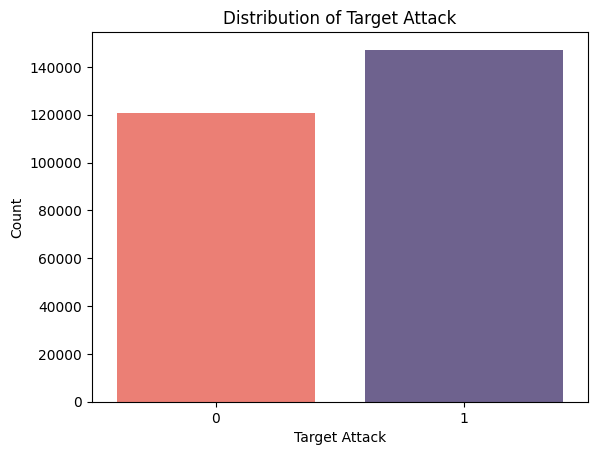

In [6]:


# Define a custom color palette with cheerful colors
palette = ["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9"]

# Create the countplot with the custom color palette
sns.set_palette(palette)
sns.countplot(x='Target Attack', data=data)
plt.title('Distribution of Target Attack')
plt.xlabel('Target Attack')
plt.ylabel('Count')
plt.show()


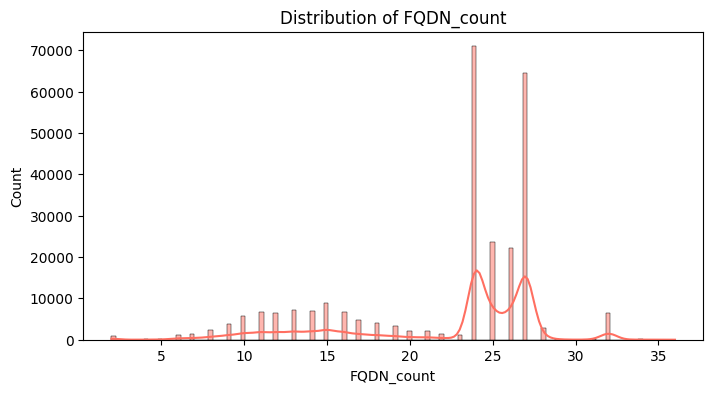

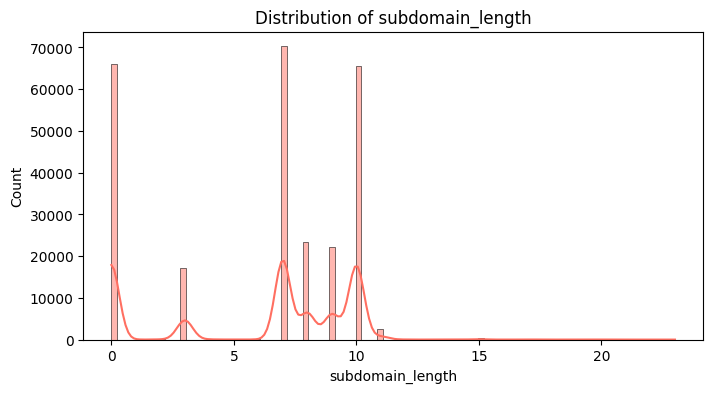

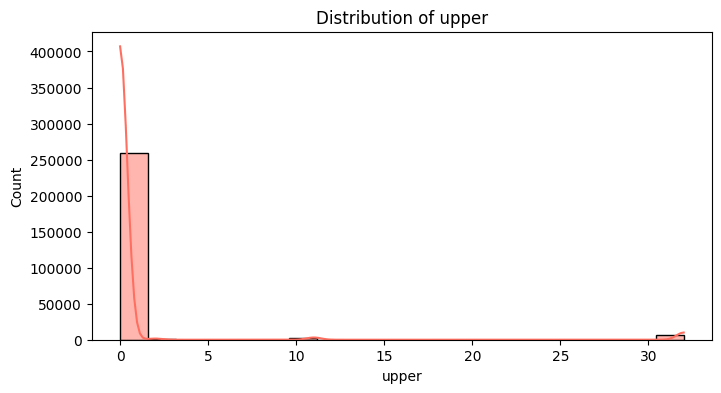

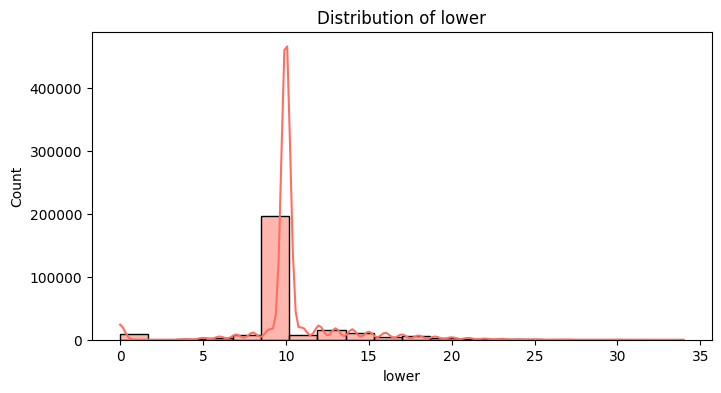

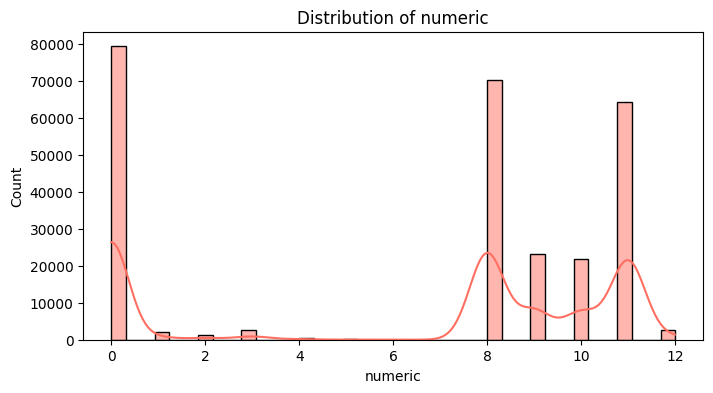

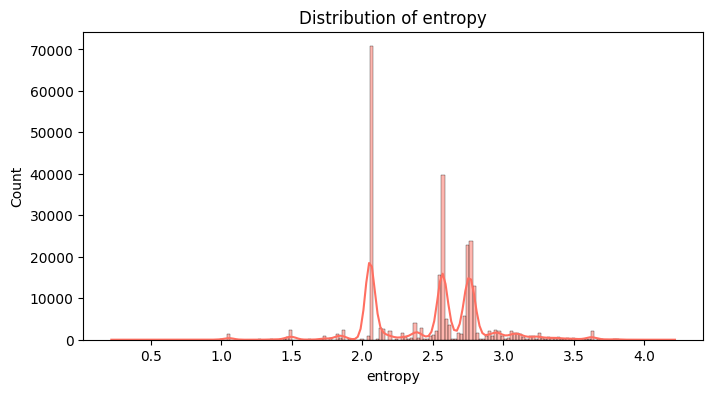

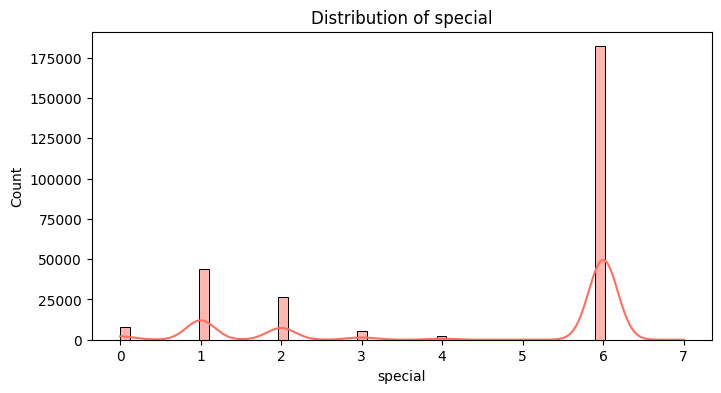

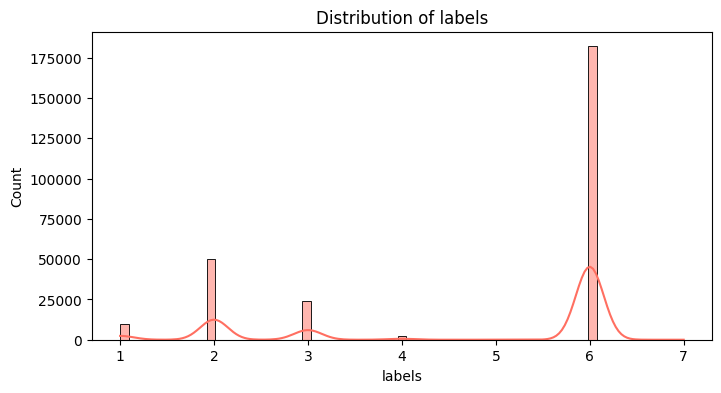

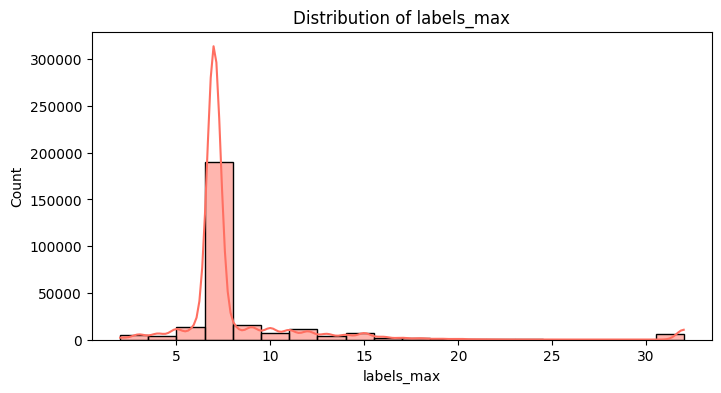

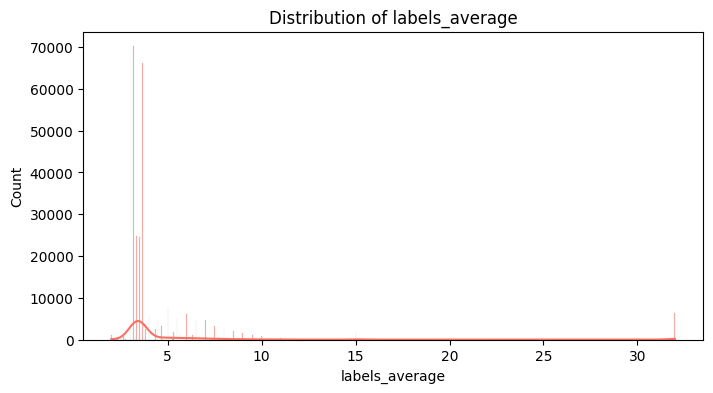

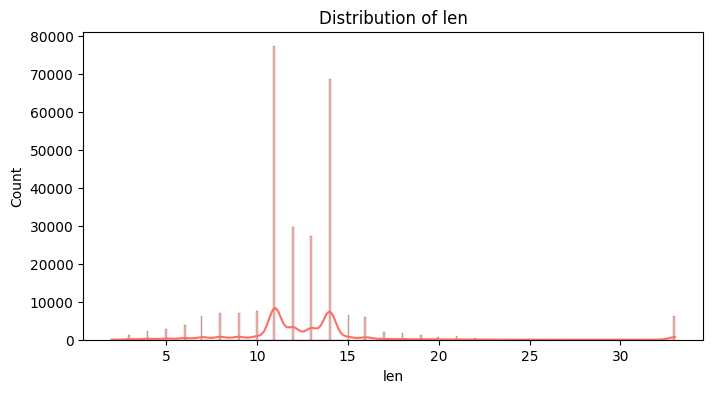

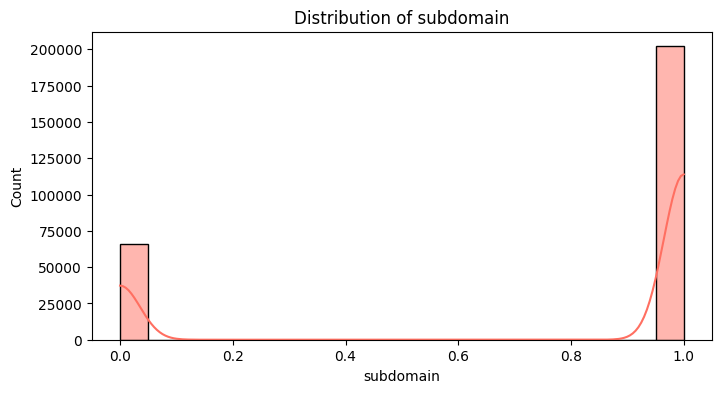

In [7]:
numerical_features = ['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'subdomain']

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


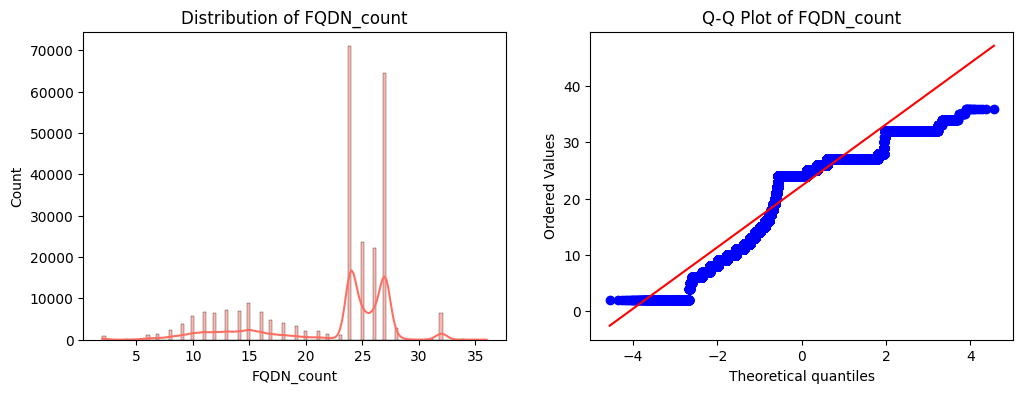

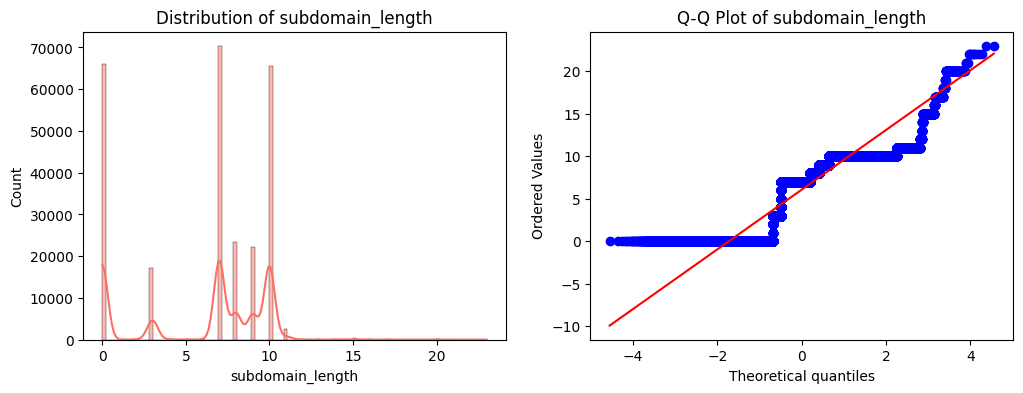

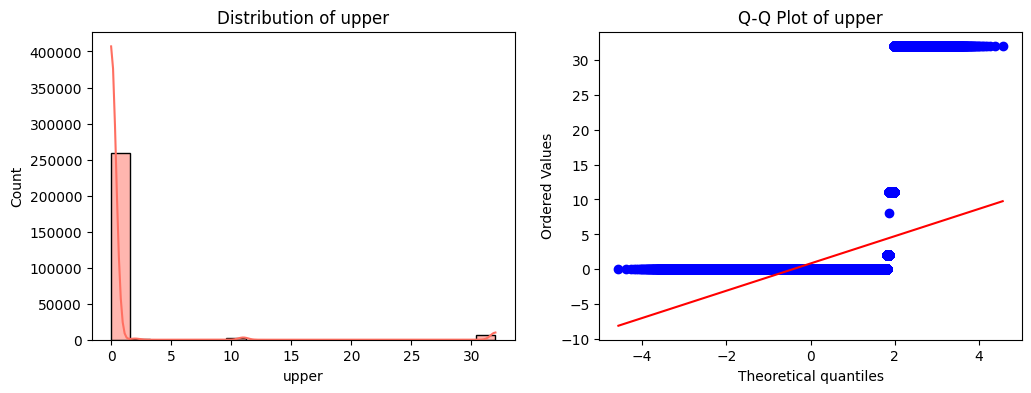

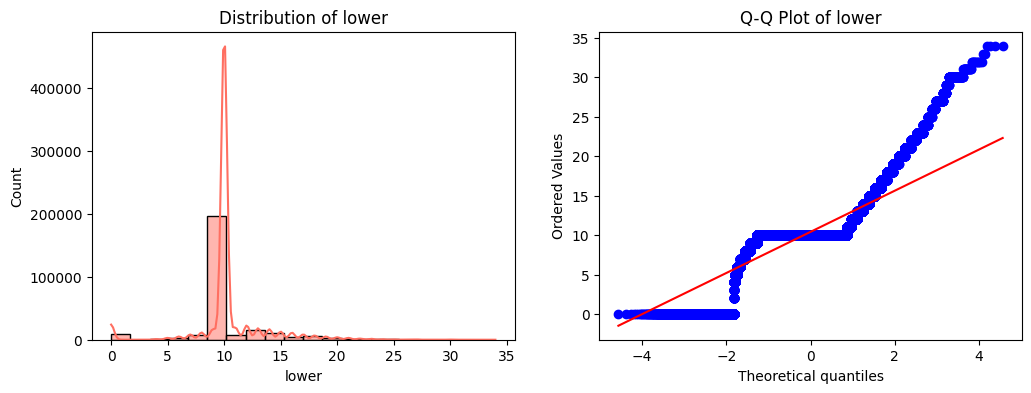

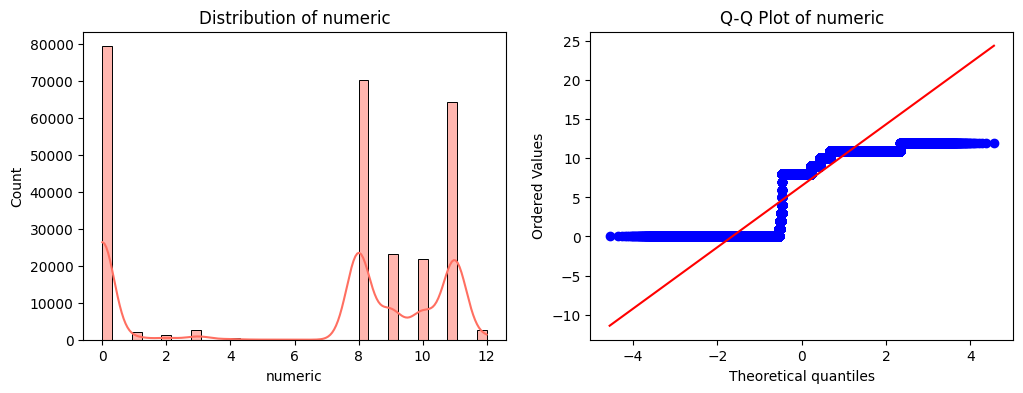

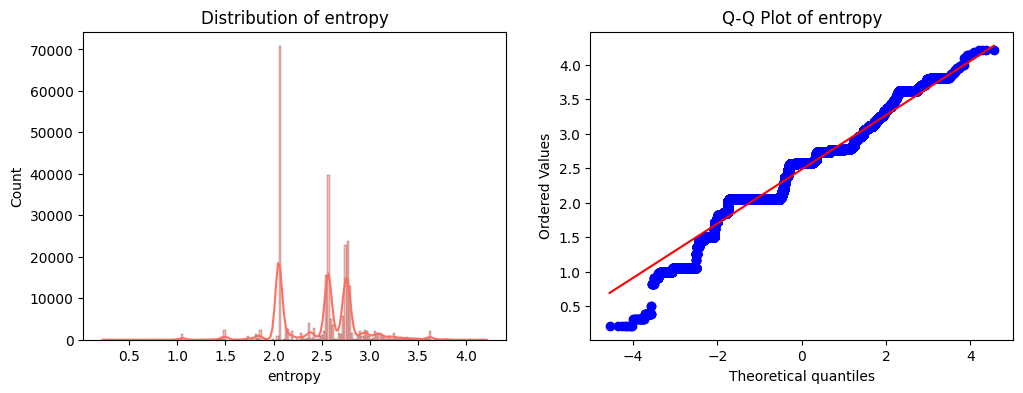

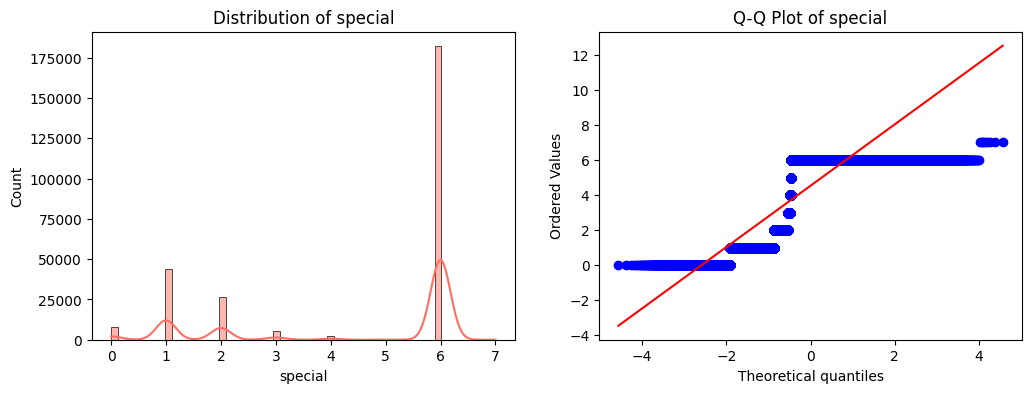

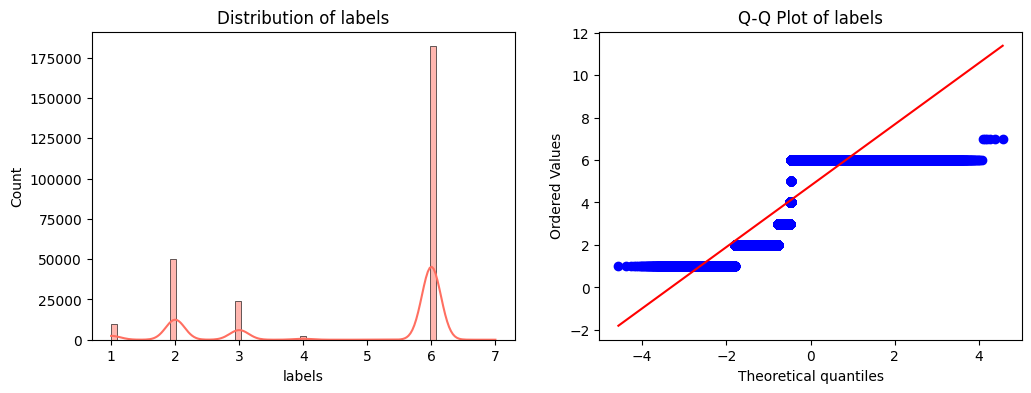

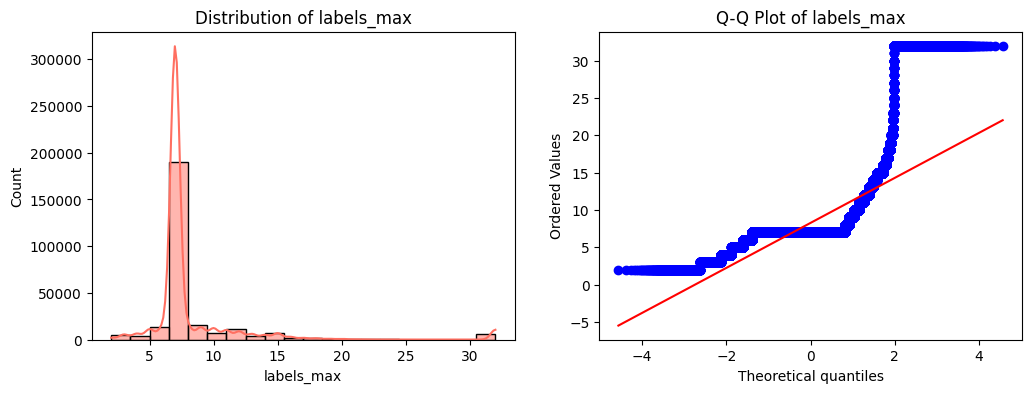

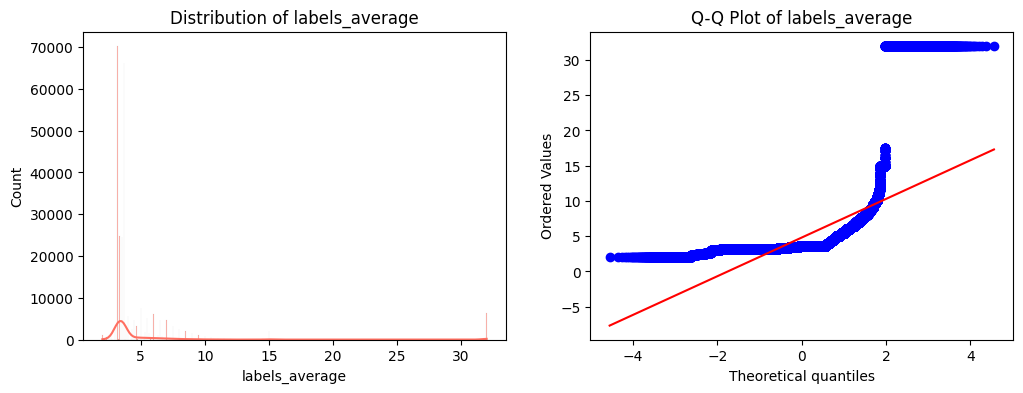

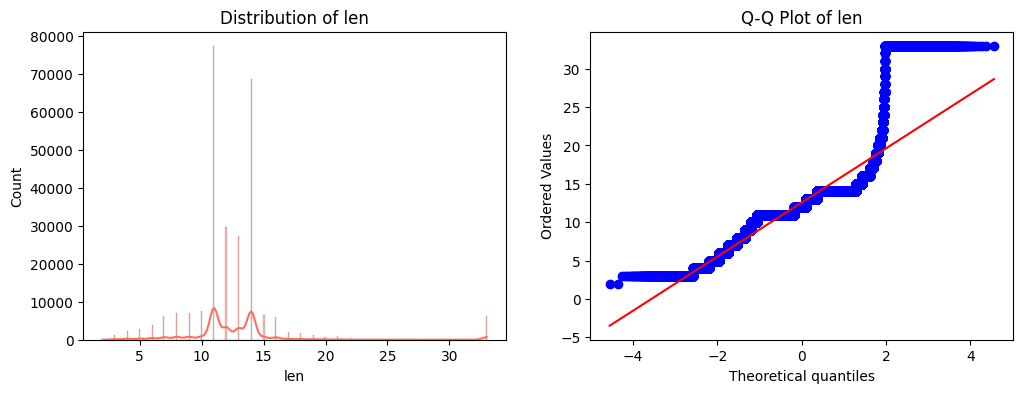

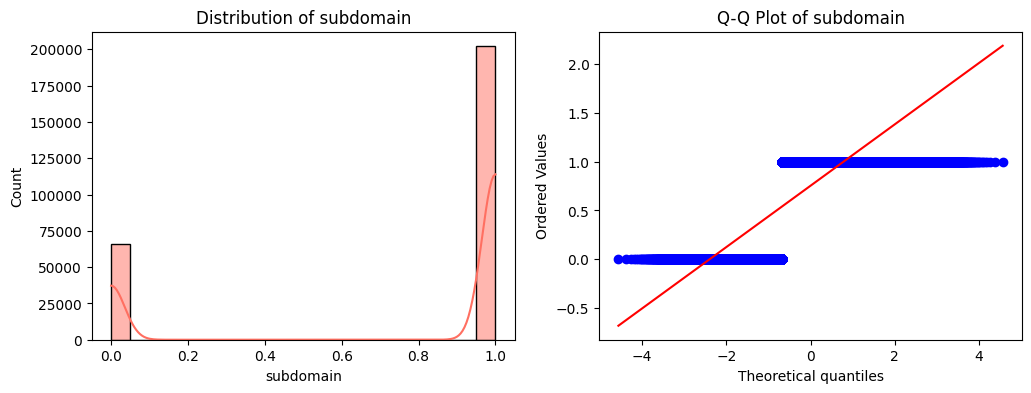

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {feature}')

    plt.show()


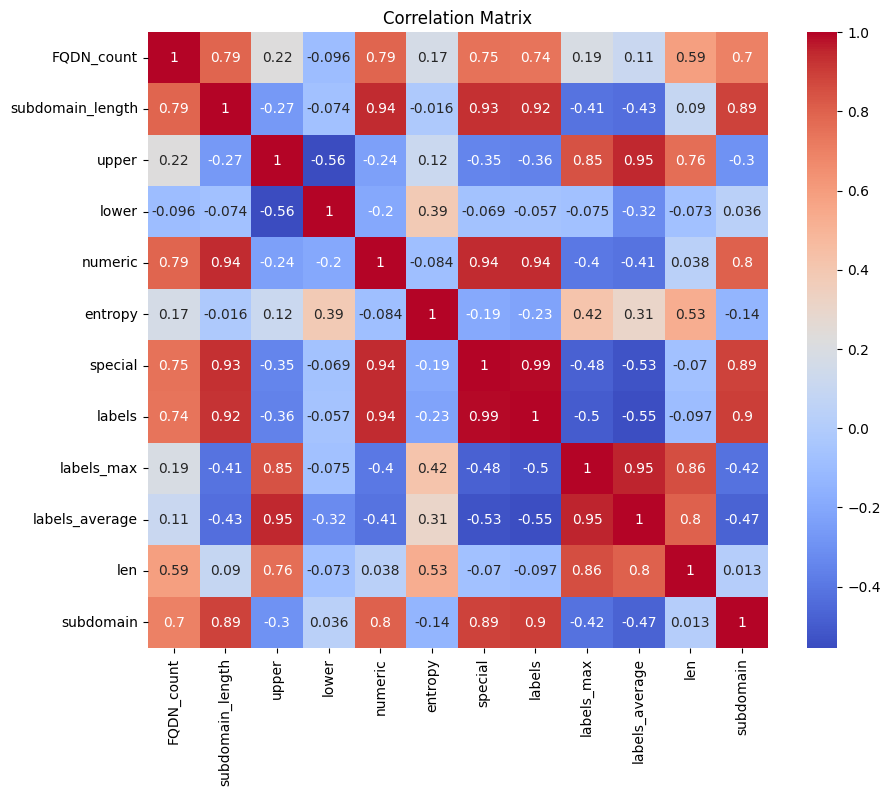

In [9]:
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# **Feature Engineering and Data cleaning**: 👍

In [10]:
missing_values = data.isnull().sum()
print(missing_values)



timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64


In [11]:
data.dropna( inplace=True)

In [12]:
data=data.drop_duplicates()

In [13]:
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [14]:
sld_mode_v=int(data["sld"].mode()[0])
longest_word_mode_v=int(data["longest_word"].mode()[0])

In [15]:
data.dropna(subset=['sld', 'longest_word'], inplace=True)

data['longest_word'] = data['longest_word'].replace(r'(([a-z]+)|([A-Z]+))', sld_mode_v, regex=True)

data['longest_word'] = data['longest_word'].astype('int')

data['sld'] = data['sld'].replace(r'(([a-z]+)|([A-Z]+|(0-1)))', longest_word_mode_v, regex=True)

data['sld'] = data['sld'].astype('int')



In [16]:
data = data.drop(columns=['timestamp'])


In [17]:
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,15,9,0,11,0,2.929439,4,3,5,4.333333,192,2,15,1,1


# **Feature selection**:  ♻

In [18]:
X = data.drop(columns=['Target Attack'])
y = data['Target Attack']


In [19]:

def feature_selection_and_plot(X, y, method='f_classif', k=13):
    if method == 'f_classif':
        selector = SelectKBest(f_classif, k=k)
    elif method == 'mutual_info_classif':
        selector = SelectKBest(mutual_info_classif, k='all')
    elif method == 'chi2':
        selector = SelectKBest(chi2, k='all')
    else:
        raise ValueError("Invalid feature selection method")

    selector.fit(X, y)
    selected_feature_names = X.columns[selector.get_support()]
    scores = selector.scores_

    plt.figure(figsize=(10, 6))
    plt.barh(selected_feature_names, scores[X.columns.isin(selected_feature_names)], color='green')
    plt.xlabel(f'{method} Score')
    plt.title(f'Top {k if k != "all" else "All"} Most Important Features ({method})')
    plt.gca().invert_yaxis()
    plt.show()




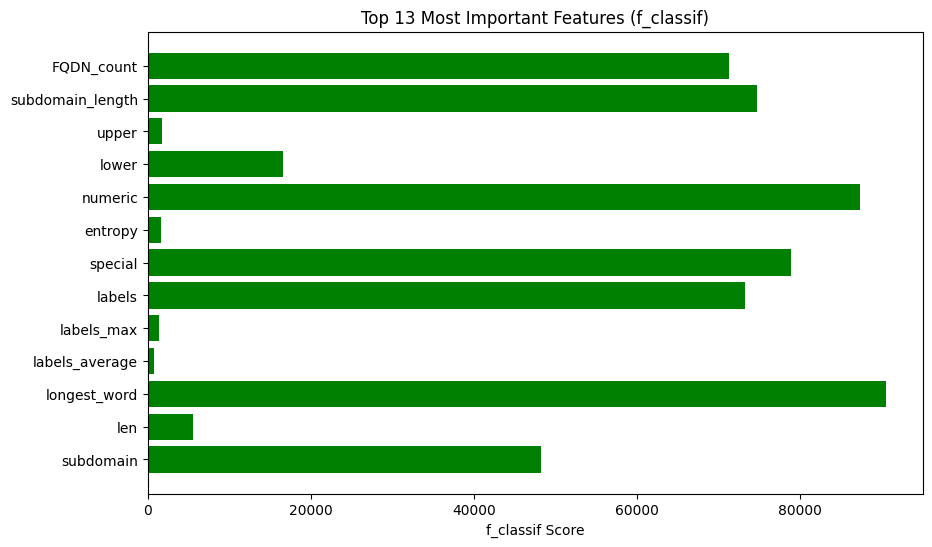

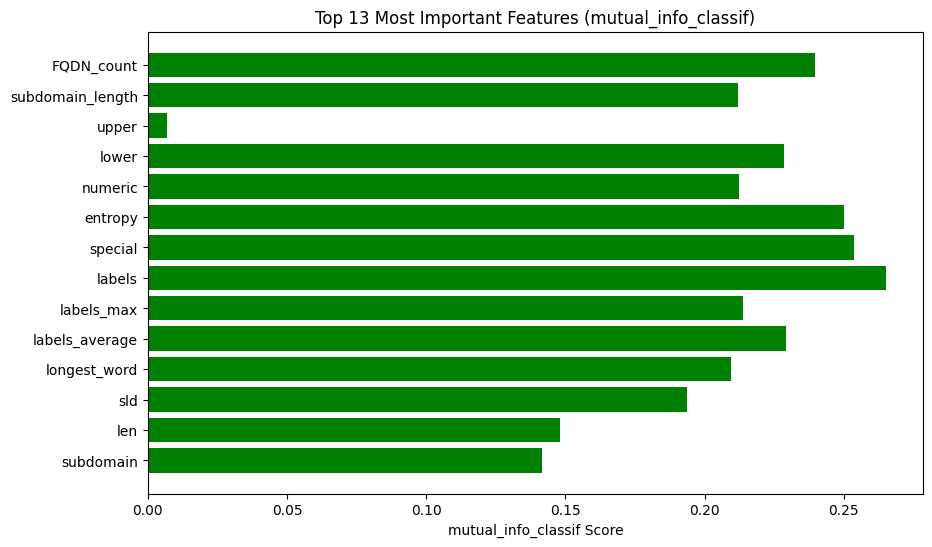

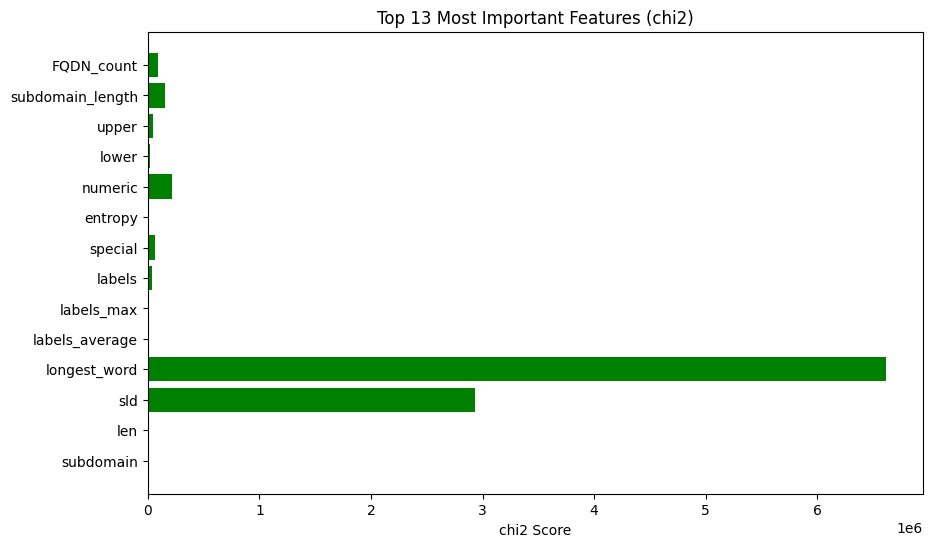

In [20]:
feature_selection_and_plot(X, y, method='f_classif', k=13)
feature_selection_and_plot(X, y, method='mutual_info_classif')
feature_selection_and_plot(X, y, method='chi2')

# **Model Training**:  🦾

In [21]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [22]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(X_train)

# Transform the test and validation sets using the same scaler
x_test = scaler.transform(X_test)
x_val = scaler.transform(X_val)


In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_test = lr_model.predict(X_val)
test_accuracy = accuracy_score(y_val , y_pred_test)
test_accuracy

0.7855143721633888

In [24]:


def select_features_and_train(X_train, X_val, y_train, y_val, method='f_classif', k=8):
    if method == 'f_classif':
        selector = SelectKBest(f_classif, k=k)
    elif method == 'mutual_info_classif':
        selector = SelectKBest(mutual_info_classif, k=k)
    elif method == 'chi2':
        selector = SelectKBest(chi2, k=k)
    else:
        raise ValueError("Invalid feature selection method")

    selector.fit(X_train, y_train)
    selected_feature_names = X_train.columns[selector.get_support()]
    X_train_selected = X_train[selected_feature_names]
    X_val_selected = X_val[selected_feature_names]

    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_selected, y_train)

    y_pred_test = lr_model.predict(X_val_selected)
    test_accuracy = accuracy_score(y_val, y_pred_test)

    model_name = f"Logistic Regression ({method})"
    print(f"{model_name} - Test Accuracy: {test_accuracy}")





In [25]:

accuracy_f_classif = select_features_and_train(X_train, X_val, y_train, y_val, method='f_classif', k=8)
accuracy_mutual_info = select_features_and_train(X_train, X_val, y_train, y_val, method='mutual_info_classif', k=8)
accuracy_chi2 = select_features_and_train(X_train, X_val, y_train, y_val, method='chi2', k=8)

Logistic Regression (f_classif) - Test Accuracy: 0.7850605143721634
Logistic Regression (mutual_info_classif) - Test Accuracy: 0.7858547655068079
Logistic Regression (chi2) - Test Accuracy: 0.7856656580937973


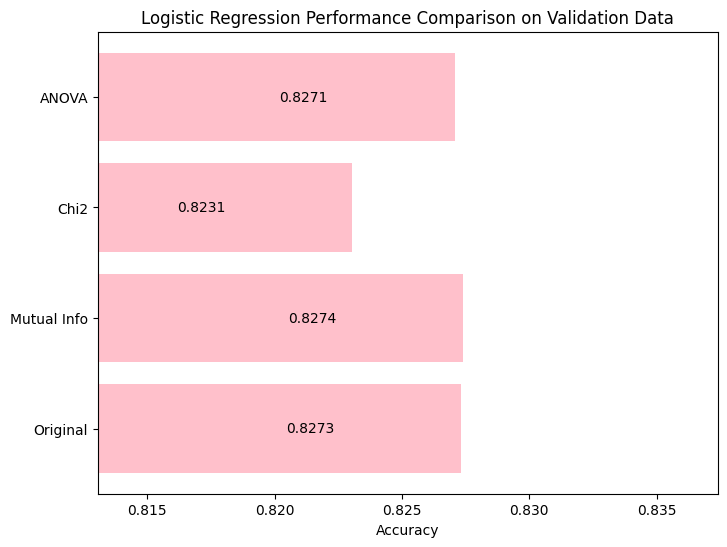

In [26]:
methods = ['Original', 'Mutual Info', 'Chi2', 'ANOVA']
accuracies = [0.8273315095747327, 0.8274061178811241, 0.8230539666749564, 0.8270828152200945]

plt.figure(figsize=(8, 6))
bars = plt.barh(methods, accuracies, color='pink')  # Changed color to 'pink'
plt.xlabel('Accuracy')
plt.title('Logistic Regression Performance Comparison on Validation Data')
plt.xlim([min(accuracies) - 0.01, max(accuracies) + 0.01])

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() - 0.005, bar.get_y() + bar.get_height() / 2, f'{accuracy:.4f}',
             ha='right', va='center', fontsize=10)

plt.show()




In [42]:
def perform_grid_search(X_train, y_train):
    # Select top 8 features using Mutual Information
    k_best = SelectKBest(mutual_info_classif, k=8)
    k_best.fit(X_train, y_train)
    feature_scores = k_best.scores_
    selected_feature_names = X_train.columns[k_best.get_support()]
    X_train_mutual_info = X_train[selected_feature_names]
    scaler = StandardScaler()
    # Fit and transform the training data and overwrite X_train_mutual_info
    X_train_mutual_info = scaler.fit_transform(X_train_mutual_info)

    # Create a pipeline with logistic regression
    pipeline = Pipeline([
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # Define hyperparameter grid for grid search
    param_grid = {
        'classifier__C': [0.01, 0.1, 1],  # Regularization parameter
        'classifier__solver': ['liblinear', 'lbfgs']  # Solver for logistic regression
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_mutual_info, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

In [43]:
best_params, best_score = perform_grid_search(X_train, y_train)
print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
Best Accuracy Score: 0.7861391965848955


In [44]:
def logistic_regression_with_mutual_info(X_train, y_train, X_test, y_test):
    # Feature selection using Mutual Information
    k_best = SelectKBest(mutual_info_classif, k=8)
    k_best.fit(X_train, y_train)
    feature_scores = k_best.scores_
    selected_feature_names = X_train.columns[k_best.get_support()]
    X_train_mutual_info = X_train[selected_feature_names]
    X_test_info = X_test[selected_feature_names]
    scaler = StandardScaler()
    # Fit and transform the training data and overwrite X_train_mutual_info
    X_train_mutual_info = scaler.fit_transform(X_train_mutual_info)


    # Create a logistic regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Define hyperparameter grid for grid search
    param_grid = {
        'C': [0.01, 0.1, 1],  # Regularization parameter
        'solver': ['liblinear', 'lbfgs']  # Solver for logistic regression
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_mutual_info, y_train)

    best_lr_model = grid_search.best_estimator_

    # Fit the best logistic regression model on the test data
    best_lr_model.fit(X_train_mutual_info, y_train)
    y_pred_test = best_lr_model.predict(X_test_info)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    return best_lr_model, test_accuracy

In [45]:
best_lr_model, test_accuracy_lr = logistic_regression_with_mutual_info(X_train, y_train, X_test, y_test)
print("Best Logistic Regression Model:", best_lr_model)
print("Test Accuracy with Mutual Info Feature Selection:", test_accuracy_lr)

Best Logistic Regression Model: LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')
Test Accuracy with Mutual Info Feature Selection: 0.7548318771511782


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [46]:

def evaluate_feature_selection(X_train, X_val, y_train, y_val, feature_selection_method):
    # Feature selection
    k_best = SelectKBest(feature_selection_method, k=8)
    k_best.fit(X_train, y_train)
    selected_feature_names = X_train.columns[k_best.get_support()]
    X_train_selected = X_train[selected_feature_names]
    X_val_selected = X_val[selected_feature_names]

    # Train a Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_selected, y_train)

    # Evaluate the model on the validation set
    y_pred_val = rf_model.predict(X_val_selected)
    accuracy = accuracy_score(y_val, y_pred_val)

    return accuracy

def feature_selection_and_model_evaluation(X_train, X_val, y_train, y_val, feature_selection_methods):
    results = {}

    for method_name, method in feature_selection_methods.items():
        accuracy = evaluate_feature_selection(X_train, X_val, y_train, y_val, method)
        results[method_name] = accuracy

    return results

# Define feature selection methods
feature_selection_methods = {
    'Mutual Info': mutual_info_classif,
    'Chi-squared': chi2,
    'ANOVA': f_classif
}

# Example usage with different feature selection methods
results = feature_selection_and_model_evaluation(X_train, X_val, y_train, y_val, feature_selection_methods)

for method, accuracy in results.items():
    print(f"{method} Accuracy: {accuracy}")




Mutual Info Accuracy: 0.788124054462935
Chi-squared Accuracy: 0.7873676248108926
ANOVA Accuracy: 0.7873676248108926


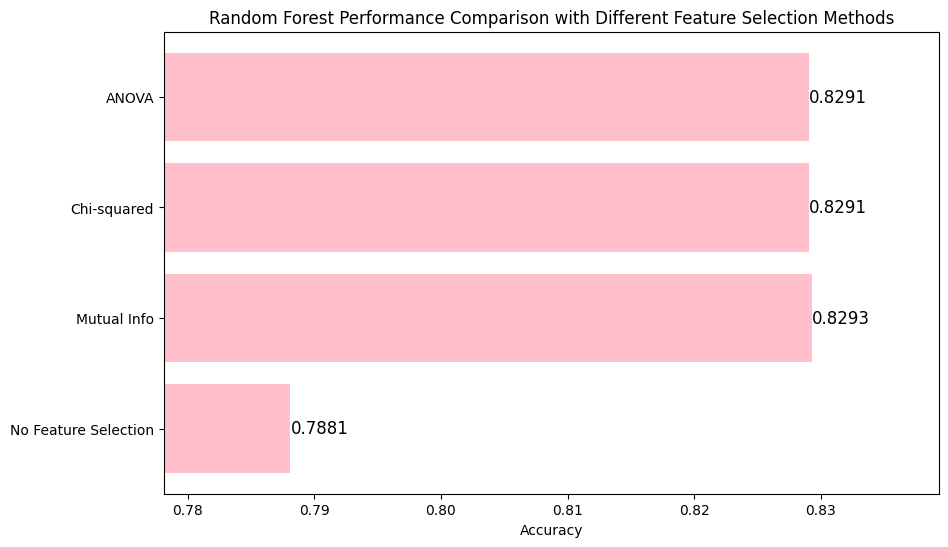

In [32]:

rf_model_full = RandomForestClassifier(random_state=42)
rf_model_full.fit(X_train, y_train)
y_pred_val_full = rf_model_full.predict(X_val)
accuracy_full = accuracy_score(y_val, y_pred_val_full)

# Create a bar plot to compare the results
methods = ['No Feature Selection', 'Mutual Info', 'Chi-squared', 'ANOVA']
accuracies = [accuracy_full, 0.8293210644118378, 0.8290972394926636, 0.8290972394926636]

plt.figure(figsize=(10, 6))
plt.barh(methods, accuracies, color='pink')  # Set bar color to pink
plt.xlabel('Accuracy')
plt.title('Random Forest Performance Comparison with Different Feature Selection Methods')
plt.xlim([min(accuracies) - 0.01, max(accuracies) + 0.01])

# Annotate the bars with their respective accuracy values
for i, v in enumerate(accuracies):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', fontsize=12)

plt.show()


In [40]:
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X_train, y_train)
selected_feature_names = X_train.columns[k_best.get_support()]
X_train_mutual_info = X_train[selected_feature_names]

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline with the Random Forest model
pipeline = Pipeline([
    ('classifier', rf_model)
])

# Define the hyperparameters and their values to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_mutual_info, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)

# Optionally, you can evaluate the model on the test set:
X_test_mutual_info = X_test[selected_feature_names]
y_pred = grid_search.predict(X_test_mutual_info)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best Accuracy Score: 0.7881248689791182
Test Set Accuracy: 0.786716592911986


In [33]:
# Perform feature selection using mutual information
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X_train, y_train)
selected_feature_names = X_train.columns[k_best.get_support()]
X_train_mutual_info = X_train[selected_feature_names]
X_train_mutual_info = scaler.fit_transform(X_train_mutual_info)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a pipeline with the Random Forest model
pipeline = Pipeline([
    ('classifier', rf_model)
])

# Define the hyperparameters and their values to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_mutual_info, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy Score:", best_score)


X_test_mutual_info = X_test[selected_feature_names]
y_pred = grid_search.predict(X_test_mutual_info)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", test_accuracy)


Best Parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 200}
Best Accuracy Score: 0.7881248689791182


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Set Accuracy: 0.5674949884640115


In [34]:


# Perform feature selection using mutual information
k_best = SelectKBest(mutual_info_classif, k=8)
k_best.fit(X, y)
selected_feature_names = X.columns[k_best.get_support()]
X_train_mutual_info = X_train[selected_feature_names]
X_test_info = X_test[selected_feature_names]

# Define the Random Forest model with feature selection
rf_model = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=50)

# Train the Random Forest model on the selected features
rf_model.fit(X_train_mutual_info, y_train)

# Make predictions on the test set
y_pred_test = rf_model.predict(X_test_info)

# Calculate accuracy on the test set
mutual_info_test_accuracy_rf = accuracy_score(y_test, y_pred_test)


print("Test Set Accuracy (Random Forest with Mutual Info Feature Selection):", mutual_info_test_accuracy_rf)


Test Set Accuracy (Random Forest with Mutual Info Feature Selection): 0.786716592911986


In [35]:
# Make predictions on the test set
y_pred_test = rf_model.predict(X_test_info)

# Calculate accuracy on the test set
mutual_info_test_accuracy_rf = accuracy_score(y_test, y_pred_test)

# Calculate F1 score on the test set
f1_test_score_rf = f1_score(y_test, y_pred_test)

# Calculate confusion matrix on the test set
conf_matrix_rf = confusion_matrix(y_test, y_pred_test)

# Print the results
print("Test Set Accuracy (Random Forest with Mutual Info Feature Selection):", mutual_info_test_accuracy_rf)
print("Test Set F1 Score (Random Forest with Mutual Info Feature Selection):", f1_test_score_rf)
print("Confusion Matrix (Random Forest with Mutual Info Feature Selection):\n", conf_matrix_rf)

Test Set Accuracy (Random Forest with Mutual Info Feature Selection): 0.786716592911986
Test Set F1 Score (Random Forest with Mutual Info Feature Selection): 0.8021472930774358
Confusion Matrix (Random Forest with Mutual Info Feature Selection):
 [[ 9369  5635]
 [    4 11431]]


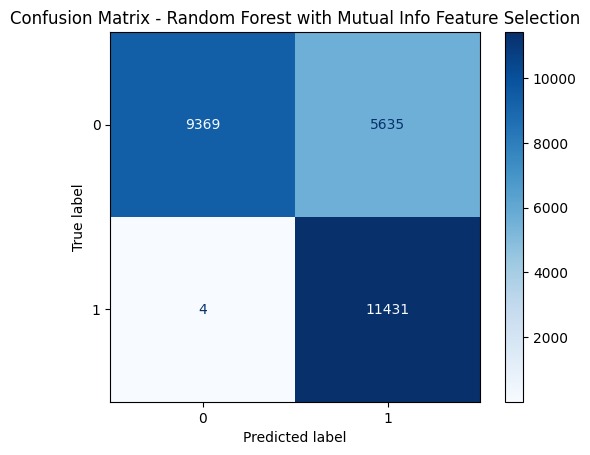

In [36]:
# Plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest with Mutual Info Feature Selection")
plt.show()

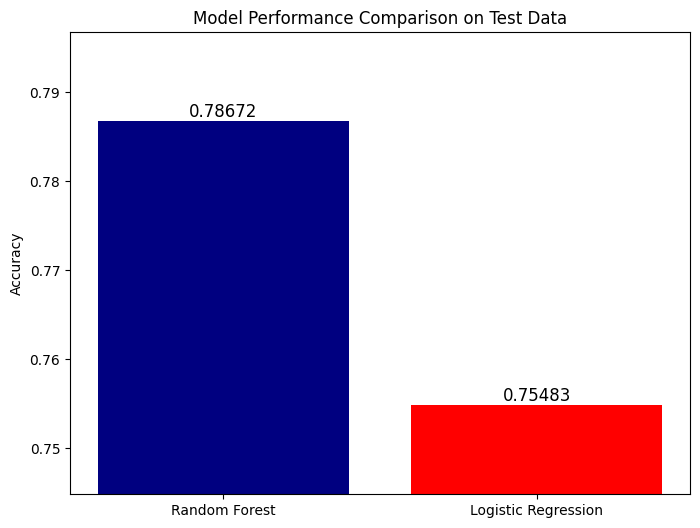

In [47]:
# Model names and their corresponding accuracies
models = ['Random Forest', 'Logistic Regression']
accuracies = [mutual_info_test_accuracy_rf, test_accuracy_lr]


colors = ['navy', 'red']

plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison on Test Data')
plt.ylim([min(accuracies) - 0.01, max(accuracies) + 0.01])

# Annotate the bars with their respective accuracy values
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy, f'{accuracy:.5f}', ha='center', va='bottom', fontsize=12)

plt.show()


In [38]:
# Define the feature selection method (mutual info with k=8)
feature_selection = SelectKBest(mutual_info_classif, k=8)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=50)

# Define the Min-Max scaler
min_max_scaler = MinMaxScaler()


pipeline = Pipeline([
    ('scaler', min_max_scaler),
    ('feature_selection', feature_selection),
    ('classifier', rf_classifier)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function mutual_info_classif at 0x7d84e5722710>)),
                ('classifier',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [48]:
import pickle
#
model_filename = 'the model.pkl'

pickle.dump(pipeline, open(model_filename, 'wb'))
print(f"Model fitted and saved as {model_filename}")

Model fitted and saved as the model.pkl
